<a href="https://colab.research.google.com/github/Jerry086/SALSA/blob/main/VGGish_Audio_Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#VGGish Audio Embedding

This colab extracts the AudioSet embeddings using a VGGish deep neural network (DNN).

#Importing and Testing the VGGish System

Based on the directions at: https://github.com/tensorflow/models/tree/master/research/audioset/vggish

In [1]:
!pip install numpy scipy
!pip install resampy tensorflow
!pip install tf_slim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 9.6 MB/s eta 0:00:00


In [2]:
!rm -rf models

In [3]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 93002, done.
remote: Counting objects: 100% (2892/2892), done.
remote: Compressing objects: 100% (1675/1675), done.
remote: Total 93002 (delta 1280), reused 2776 (delta 1193), pack-reused 90110
Receiving objects: 100% (93002/93002), 616.94 MiB | 28.65 MiB/s, done.
Resolving deltas: 100% (66217/66217), done.


In [4]:
# Check to see where are in the kernel's file system.
!pwd

/content


In [5]:
# Grab the VGGish model
!curl -O https://storage.googleapis.com/audioset/vggish_model.ckpt
!curl -O https://storage.googleapis.com/audioset/vggish_pca_params.npz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  277M  100  277M    0     0  88.4M      0  0:00:03  0:00:03 --:--:-- 88.4M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 73020  100 73020    0     0   355k      0 --:--:-- --:--:-- --:--:--  356k


In [6]:
# Make sure we got the model data.
!ls

models	sample_data  vggish_model.ckpt	vggish_pca_params.npz


In [7]:
# Verify the location of the AudioSet source files
!ls models/research/audioset/vggish

mel_features.py   vggish_export_tfhub.py    vggish_params.py	   vggish_smoke_test.py
README.md	  vggish_inference_demo.py  vggish_postprocess.py  vggish_train_demo.py
requirements.txt  vggish_input.py	    vggish_slim.py


In [8]:
# Copy the source files to the current directory.
!cp models/research/audioset/vggish/* .

In [9]:
# Make sure the source files got copied correctly.
!ls

mel_features.py   sample_data		    vggish_model.ckpt	   vggish_slim.py
models		  vggish_export_tfhub.py    vggish_params.py	   vggish_smoke_test.py
README.md	  vggish_inference_demo.py  vggish_pca_params.npz  vggish_train_demo.py
requirements.txt  vggish_input.py	    vggish_postprocess.py


In [10]:
# Run the test, which also loads all the necessary functions.
from vggish_smoke_test import *


Testing your install of VGGish

Resampling via resampy works!
Log Mel Spectrogram example:  [[-4.48313252 -4.27083405 -4.17064267 ... -4.60069383 -4.60098887
  -4.60116305]
 [-4.48313252 -4.27083405 -4.17064267 ... -4.60069383 -4.60098887
  -4.60116305]
 [-4.48313252 -4.27083405 -4.17064267 ... -4.60069383 -4.60098887
  -4.60116305]
 ...
 [-4.48313252 -4.27083405 -4.17064267 ... -4.60069383 -4.60098887
  -4.60116305]
 [-4.48313252 -4.27083405 -4.17064267 ... -4.60069383 -4.60098887
  -4.60116305]
 [-4.48313252 -4.27083405 -4.17064267 ... -4.60069383 -4.60098887
  -4.60116305]]


/usr/local/lib/python3.10/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1697: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/usr/local/lib/python3.10/dist-packages/tensorflow/python/keras/legacy_tf_layers/core.py:318: UserWarning: `tf.layers.flatten` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Flatten` instead.
  warnings.warn('`tf.layers.flatten` is deprecated and '


VGGish embedding:  [-2.72986382e-01 -1.80314153e-01  5.19921184e-02 -1.43571526e-01
 -1.04673728e-01 -4.96598154e-01 -1.75267965e-01  4.23147976e-01
 -8.22126150e-01 -2.16801405e-01 -1.17509276e-01 -6.70077026e-01
  1.43174574e-01 -1.44183934e-01  8.73491913e-03 -8.71972442e-02
 -1.84393525e-01  5.96655607e-01 -3.43809605e-01 -5.79104424e-02
 -1.65071294e-01  4.22911644e-02 -2.55293399e-01 -2.36356765e-01
  1.80295616e-01  3.02612185e-01  1.08356833e-01 -4.48398024e-01
  1.22757629e-01 -2.99955189e-01 -5.55934191e-01  5.05966544e-01
  2.05210358e-01  8.87591839e-01  9.03702497e-01 -2.10566416e-01
 -3.27462405e-02  1.38691410e-01 -2.27416530e-01  1.14804000e-01
  5.95410109e-01 -4.76971269e-01  2.28232622e-01  1.54627025e-01
  1.64934218e-01  7.19252825e-01  1.24101830e+00  5.61996222e-01
  2.73531973e-01  3.09788287e-02  2.10977703e-01 -6.09551668e-01
 -3.15282375e-01  1.76392645e-01 -8.96190405e-02 -4.26822364e-01
  3.12993884e-01 -1.56592295e-01  3.31673503e-01  1.29436389e-01
  1.66

In [11]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
from __future__ import print_function

import numpy as np
import six
import soundfile
import tensorflow.compat.v1 as tf

import vggish_input
import vggish_params
import vggish_postprocess
import vggish_slim
import soundfile as sf

import os

In [15]:
# get wav file from directory
def get_filenames(directory_path):
  filenames = []
  for filename in os.listdir(directory_path):
      if filename.endswith(".wav"):
          file_path = os.path.join(directory_path, filename)
          filenames.append(file_path)
  return filenames

In [16]:
# get filename list
directory_path = '/content/drive/MyDrive/db/audios_30'
filenames = get_filenames(directory_path)
print(filenames)

['/content/drive/MyDrive/db/audios_30/27-whitenoise1.wav', '/content/drive/MyDrive/db/audios_30/24-violin1.wav', '/content/drive/MyDrive/db/audios_30/13-fire2.wav', '/content/drive/MyDrive/db/audios_30/9-clap2.wav', '/content/drive/MyDrive/db/audios_30/10-dog.wav', '/content/drive/MyDrive/db/audios_30/18-music3.wav', '/content/drive/MyDrive/db/audios_30/15-helicopter1.wav', '/content/drive/MyDrive/db/audios_30/21-noise2.wav', '/content/drive/MyDrive/db/audios_30/29-wind1.wav', '/content/drive/MyDrive/db/audios_30/7-cat2.wav', '/content/drive/MyDrive/db/audios_30/6-cat.wav', '/content/drive/MyDrive/db/audios_30/12-fire1.wav', '/content/drive/MyDrive/db/audios_30/16-motoboat.wav', '/content/drive/MyDrive/db/audios_30/17-music1.wav', '/content/drive/MyDrive/db/audios_30/11-echo1.wav', '/content/drive/MyDrive/db/audios_30/5-bird.wav', '/content/drive/MyDrive/db/audios_30/22-skateboard.wav', '/content/drive/MyDrive/db/audios_30/30-wind2.wav', '/content/drive/MyDrive/db/audios_30/25-water1.w

In [18]:
# restore PCA parameters
pproc = vggish_postprocess.Postprocessor('vggish_pca_params.npz')

In [30]:
# function to genenrate VGGish embeddings from a wav file
def VGGish_embeddings(wav_file):
  example_batch = vggish_input.wavfile_to_examples(wav_file)
  with tf.Graph().as_default(), tf.Session() as sess:
    vggish_slim.define_vggish_slim(training=False)
    vggish_slim.load_vggish_slim_checkpoint(sess, 'vggish_model.ckpt')
    features_tensor = sess.graph.get_tensor_by_name(vggish_params.INPUT_TENSOR_NAME)
    embedding_tensor = sess.graph.get_tensor_by_name(vggish_params.OUTPUT_TENSOR_NAME)
    # Run inference and postprocessing.
    [embedding] = sess.run([embedding_tensor],feed_dict={features_tensor: example_batch})
    postprocessed = pproc.postprocess(embedding)
    print(f'{wav_file} embedding shape: {postprocessed.shape}')
  return postprocessed

In [48]:
# function to generate, process and normalize embeddings
def generate_embeddings(filenames):
  results = {}
  for filename in filenames:
    model_embeddings = VGGish_embeddings(filename)
    flat_embeddings = model_embeddings.flatten()
    normalized_embeddings = flat_embeddings / 255
    basename = os.path.basename(filename)
    results[basename] = normalized_embeddings
  return results

In [54]:
# test embeddings of audio_30
embeddings_dic = generate_embeddings(filenames)
print(embeddings_dic[os.path.basename(filenames[0])])

/usr/local/lib/python3.10/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1697: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/usr/local/lib/python3.10/dist-packages/tensorflow/python/keras/legacy_tf_layers/core.py:318: UserWarning: `tf.layers.flatten` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Flatten` instead.
  warnings.warn('`tf.layers.flatten` is deprecated and '


/content/drive/MyDrive/db/audios_30/27-whitenoise1.wav embedding shape: (10, 128)
/content/drive/MyDrive/db/audios_30/24-violin1.wav embedding shape: (10, 128)
/content/drive/MyDrive/db/audios_30/13-fire2.wav embedding shape: (10, 128)
/content/drive/MyDrive/db/audios_30/9-clap2.wav embedding shape: (10, 128)
/content/drive/MyDrive/db/audios_30/10-dog.wav embedding shape: (10, 128)
/content/drive/MyDrive/db/audios_30/18-music3.wav embedding shape: (10, 128)
/content/drive/MyDrive/db/audios_30/15-helicopter1.wav embedding shape: (10, 128)
/content/drive/MyDrive/db/audios_30/21-noise2.wav embedding shape: (10, 128)
/content/drive/MyDrive/db/audios_30/29-wind1.wav embedding shape: (10, 128)
/content/drive/MyDrive/db/audios_30/7-cat2.wav embedding shape: (10, 128)
/content/drive/MyDrive/db/audios_30/6-cat.wav embedding shape: (10, 128)
/content/drive/MyDrive/db/audios_30/12-fire1.wav embedding shape: (10, 128)
/content/drive/MyDrive/db/audios_30/16-motoboat.wav embedding shape: (10, 128)
/

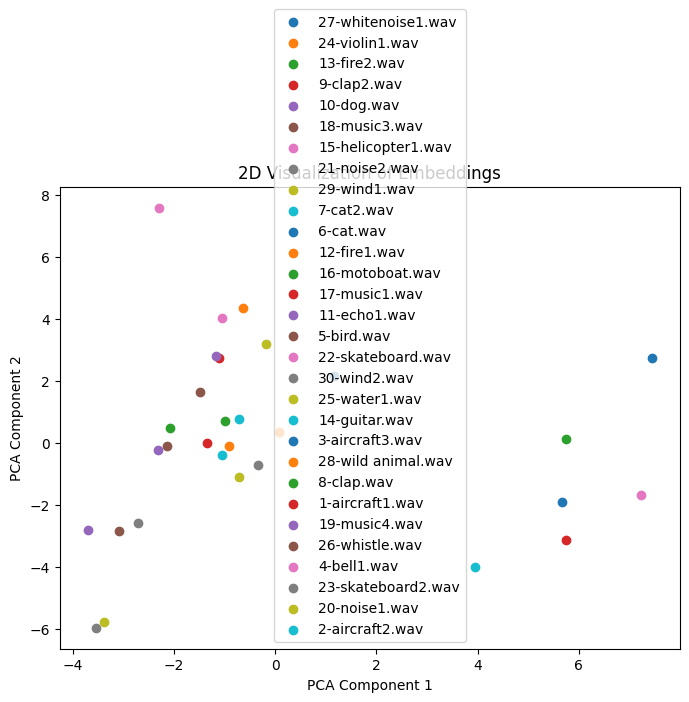

In [57]:
# visulaize embeddings in reduced dimension
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Extract embeddings into a NumPy array
embeddings = np.array(list(embeddings_dic.values()))

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
embeddings_reduced = pca.fit_transform(embeddings)

# Plotting
plt.figure(figsize=(8, 6))
for (x, y), label in zip(embeddings_reduced, embeddings_dic.keys()):
  # if 'aircraft' in label:
    plt.scatter(x, y, label=label)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D Visualization of Embeddings')
plt.legend()
plt.show()

In [42]:
# export audio embeddings
import json

for k,v in embeddings_dic.items():
  embeddings_dic[k] = v.tolist()

json_file_path = 'embeddings.json'

with open(json_file_path, 'w') as json_file:
  json.dump(embeddings_dic, json_file)

print(f"Data has been exported to {json_file_path}.")

Data has been exported to embeddings.json.
